# precision and recall

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import itertools

import pandas as pd
import upath
import extras

In [3]:
import logging

# set up handler
handler = logging.StreamHandler()
formatter = logging.Formatter("%(asctime)s %(levelname)s %(message)s")
handler.setFormatter(formatter)
logging.getLogger().handlers = [handler]

# set up logger
logger = logging.getLogger(__name__)

# set levels
logging.getLogger().setLevel("INFO")
logger.setLevel("DEBUG")
logging.getLogger("extras").setLevel("INFO")

In [4]:
path_root = upath.UPath("gs://liulab/differential_composition_and_expression/20230317_06h00m45s")
# print(extras.get_parquet_paths(path_root))
# !gsutil ls "{path_root}/*"

In [5]:
df_gene_stats = extras.load_gene_stats(path_root)

In [6]:
df_gene_stats.groupby(["origin", "run_id"]).size()

origin                run_id
bulk                  00        899528
                      01        706772
malignant_cibersortx  00        899528
                      01        706772
dtype: int64

In [7]:
df = df_gene_stats.xs("malignant_cibersortx", level="origin", drop_level=False).xs(
    "00", level="run_id", drop_level=False
)
df_prc = extras.calculate_precision_and_recall(df)
df_prc

precision  recall  thresholds
malignant_means log2_fc run_id                                    
0.55,0.85       -1.50   00     0      0.006225    1.00   -4.900218
                               1      0.006226    1.00   -4.550631
                               2      0.006226    1.00   -3.855044
                               3      0.006227    1.00   -3.734957
                               4      0.006227    1.00   -3.652061
...                                        ...     ...         ...
0.85,0.55       1.50    00     7070   0.500000    0.02   11.029848
                               7071   0.666667    0.02   11.176940
                               7072   1.000000    0.02   12.464987
                               7073   1.000000    0.01   13.832474
                               7074   1.000000    0.00         inf

[300098 rows x 3 columns]

In [10]:
fig = extras.plot_precision_recall_curve(df_prc)

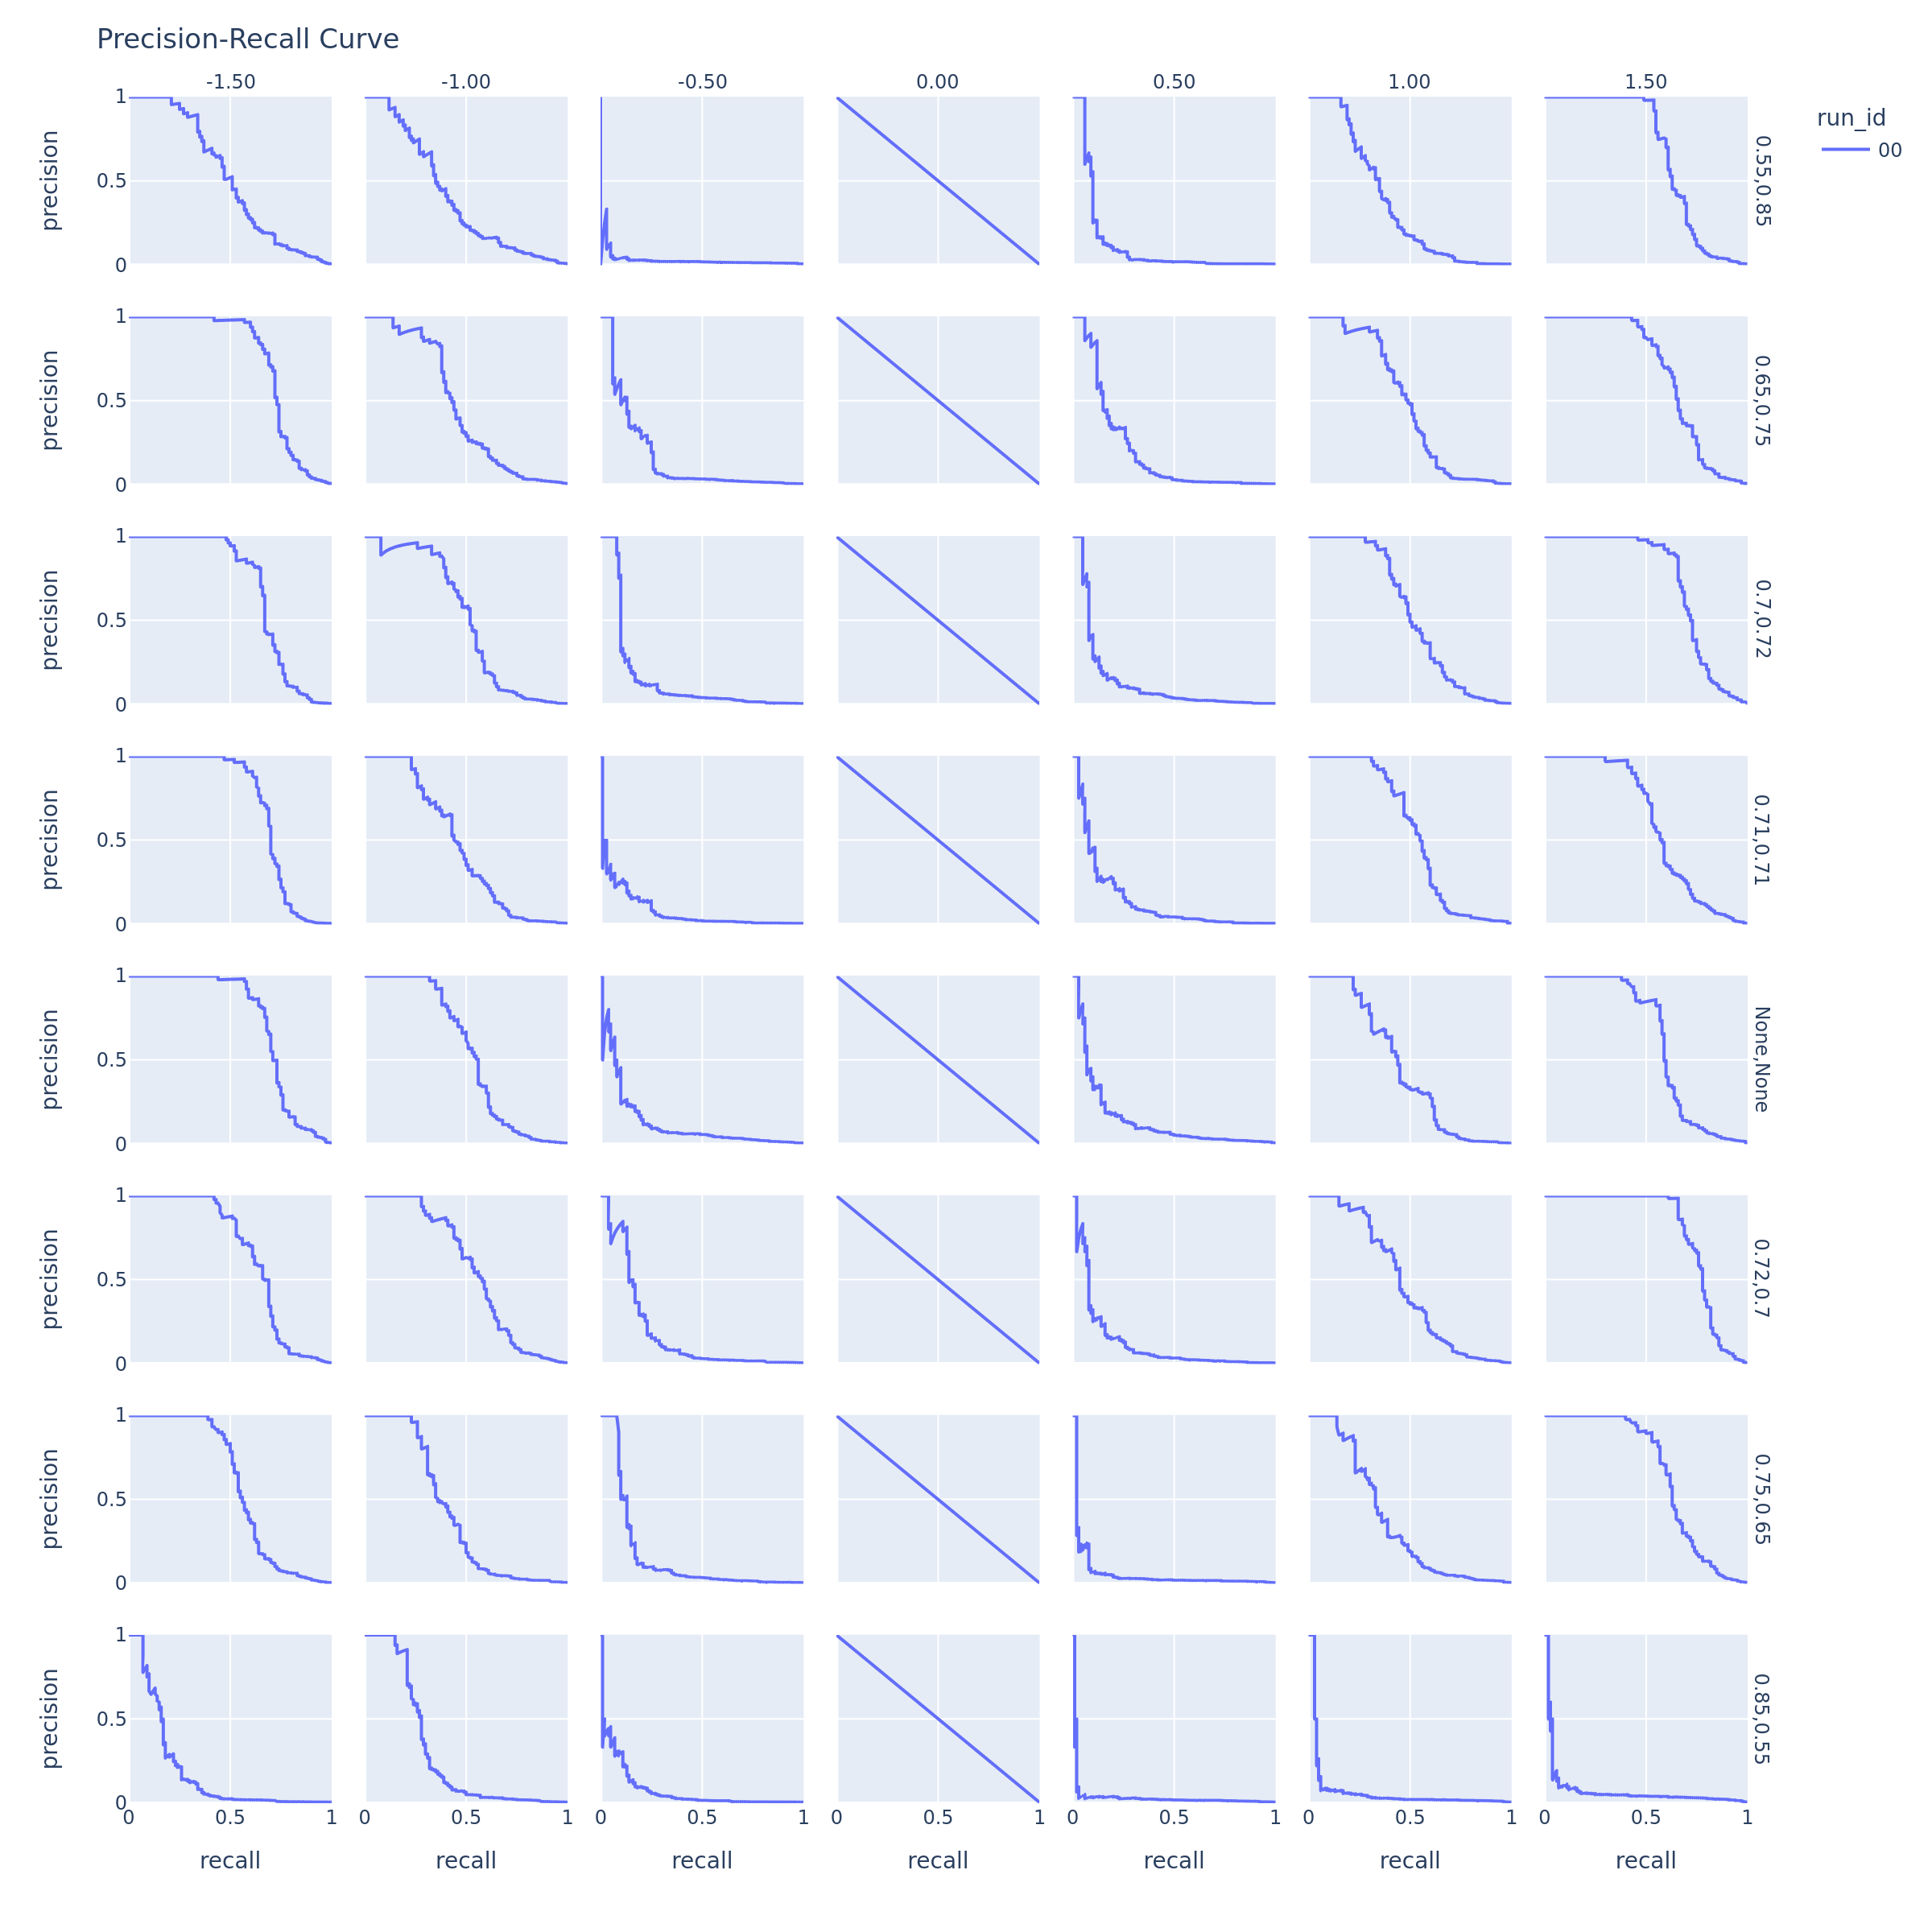

In [12]:
fig.update_layout(width=1200, height=1200)
fig.show(renderer="png", scale=2)